# Malicious_URL_Detection (Phishing) 

**Author:** Marco Antonio García Sánchez  
**Objective:** Explore, preprocess, and classify URLs as **Benign or Phishing** using Support Vector Machines (SVM) and dimensionality reduction techniques (PCA).  
**Dataset:** [CIC Malicious URL Dataset (2016)](https://www.unb.ca/cic/datasets/url-2016.html) – initially contains more than **114,000 URLs** across five categories (Benign, Spam, Phishing, Malware, Defacement).  

---

**Original source / credit:**  
This notebook is based on the Udemy course: **"Machine Learning y Data Science: Curso Completo con Python"**  
- **Instructor:** [Santiago Hernández](https://www.udemy.com/user/shramos/) – Expert in Cybersecurity and Artificial Intelligence  
- **Website:** [techmind.ac](https://techmind.ac/)  
- **Course URL:** [udemy.com/course/machine-learning-desde-cero/learn/lecture/19203700](http://udemy.com/course/machine-learning-desde-cero/learn/lecture/19203700)  

**Modifications and improvements:**  
- Reorganized notebook sections for clarity and reproducibility.  
- Focused analysis on **Phishing vs Benign URLs** for targeted classification.  
- Added **detailed Markdown documentation** in English and Spanish.  
- Implemented **URL preprocessing**: lexical feature extraction (length, digits, special characters, presence of IPs, domain ratios, etc.).  
- Cleaned and prepared the dataset for **binary classification**.  
- Trained and evaluated **SVM models** with different kernels: linear, polynomial, and Gaussian (RBF).  
- Applied **Principal Component Analysis (PCA)** to reduce dimensionality and visualize data in 2D and 3D.  
- Compared SVM performance with full feature set versus PCA-reduced components.  
- Enhanced evaluation using **accuracy, precision, recall, F1-score, and classification reports**.  
- Standardized code and workflow for inclusion in a **GitHub portfolio**.

---

This notebook demonstrates a complete workflow from raw URL data to a trained predictive model for phishing URL detection, including exploratory analysis, preprocessing, SVM classification, dimensionality reduction, and performance evaluation.

## 1.- Introduction  

#### Context  
The web has become a major platform for online criminal activities, with URLs serving as the primary vehicle for delivering threats such as spam, phishing, malware, and defacement attacks. Traditional blacklist-based approaches provide partial protection by blocking known malicious domains, but they fail to address **new and previously unseen threats** that emerge constantly.  

#### Problem  
To effectively counter these evolving attacks, it is necessary to go beyond blacklisting and adopt **machine learning (ML) techniques** capable of proactively detecting malicious URLs, including those that do not yet appear in existing blacklists.  

#### Dataset (CIC-2016)  
This study leverages the **CIC Malicious URL dataset (2016)**, which contains more than **114,000 URLs** across five categories:  

- **Benign URLs**: ~35,300 collected from Alexa top-ranked websites and validated through VirusTotal.  
- **Spam URLs**: ~12,000 obtained from the publicly available WEBSPAM-UK2007 dataset.  
- **Phishing URLs**: ~10,000 collected from OpenPhish, a repository of active phishing sites.  
- **Malware URLs**: ~11,500 obtained from DNS-BH, a project maintaining malware domain lists.  
- **Defacement URLs**: ~45,450 collected from Alexa trusted domains hosting compromised or fraudulent web pages.  

**Total**: More than **114,000 URLs** categorized into five classes.  

#### Reference  
Mamun, M. S. I., Rathore, M. A., Lashkari, A. H., Stakhanova, N., & Ghorbani, A. A. (2016). *Detecting Malicious URLs Using Lexical Analysis*. In **Network and System Security** (pp. 467–482). Springer International Publishing.  

---

### Objectives  
- Develop a **machine learning model** to classify URLs into benign, spam, phishing, malware, or defacement categories.  
- Evaluate the performance of **Support Vector Machines (SVM)** for detecting malicious URLs.  
- Compare SVM with alternative models (e.g., Logistic Regression, Random Forest, XGBoost) to establish a performance benchmark.  
- Highlight key lexical features of URLs that contribute most to classification.  

---

### Methodology  

1. **Data Collection**  
   - Downloaded the CIC Malicious URL Dataset (2016), containing over **114,000 URLs** across five categories: Benign, Spam, Phishing, Malware, and Defacement.  
   - Verified data quality, removed duplicates, and ensured consistency across features.  

2. **Data Preprocessing**  
   - Extracted lexical features from URLs (length, number of special characters, digits, presence of IP addresses, domain ratios, etc.).  
   - Checked for missing or infinite values and applied imputation strategies (median imputation for missing values, column removal for infinite values).  
   - Normalized features using **RobustScaler** to handle outliers.  

3. **Model Development**  
   - Trained **Support Vector Machines (SVM)** classifiers using different kernels: linear, polynomial, and RBF (Gaussian).  
   - Applied **Principal Component Analysis (PCA)** to reduce dimensionality and visualize data in 2D and 3D.  
   - Compared SVM performance on PCA-reduced datasets versus full feature sets (all 79 features).  
   - Conducted hyperparameter tuning for SVM kernels (C, gamma, degree).  

4. **Evaluation**  
   - Measured performance using **Accuracy, Precision, Recall, and F1-Score**.  
   - Analyzed confusion matrices to detect common misclassifications.  
   - Visualized decision boundaries for SVM classifiers after PCA reduction (2D and 3D).  

5. **Comparison & Insights**  
   - Compared SVM results on PCA-reduced datasets with full feature set models to understand the impact of dimensionality reduction.  
   - Observed that PCA can reduce noise and improve generalization in some cases, while retaining most of the predictive power.  
   - Identified key features (e.g., `domainLength`, `domainUrlRatio`) that strongly influence the classification of malicious URLs.  

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline

In [4]:
import warnings
# We ignore some warnings that occur when invoking the pipeline without feature names
warnings.filterwarnings('ignore', category=UserWarning, message='.*X does not have valid feature names.*')
warnings.filterwarnings('ignore', category=RuntimeWarning, message='.*invalid value encountered in subtract.*')


### 📌 Function: `train_val_test_split`

This function performs a **complete dataset split** into three subsets:  
- **Training (train)** → 60%  
- **Validation (val)** → 20%  
- **Test (test)** → 20%  

---

### 🔎 Parameters
- `df`: DataFrame containing the input data.  
- `rstate=42`: Random seed for reproducibility.  
- `shuffle=True`: If `True`, shuffles the data before splitting.  
- `stratify=None`: Column name for stratification (keeps class proportions in all three sets).

This function is documented and explained in more detail (including the reason for its existence and usefulness) in the same repository, at the following path:

Data-Science-Projects/2.-Data Cleaning & Preprocessing/Preprocessing_data_in_network_traffic_classification_example
https://github.com/MarcoAntonioGarcia/Data-Science-Projects/blob/main/2.-Data%20Cleaning%20%26%20Preprocessing/Preprocessing_data_in_network_traffic_classification_example/2.-Data%20Partitioning_in_network_traffic_classification_example.ipynb

---



In [6]:
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

## 2.- Dataset Selection: **Phishing vs. Benign**

For the experiments and visualizations in this notebook, we will work exclusively with the **binary subset** consisting of **Phishing** and **Benign** (legitimate) URLs. Although the original dataset contains multiple classes —spam, malware, defacement, among others— we have decided to focus the initial analysis on this pair of classes for the following reasons:

- **Methodological clarity:** the binary setup makes decision boundary visualization (2D plots) straightforward and aligns with the pedagogical purpose of step-by-step demonstrations.  
- **Practical relevance:** phishing detection is a top priority in cybersecurity and serves as a representative case study before scaling up to multiclass classification.  
- **Controlled evaluation:** starting with two classes reduces confounding factors (e.g., multi-class imbalance, overlapping attack categories) and allows us to fine-tune preprocessing, feature engineering, and evaluation metrics prior to handling the full dataset.

---

#### Why focus on *phishing*?

**Phishing** is one of the most frequent and effective cyber threats in the modern digital ecosystem. It involves deceiving users into disclosing sensitive information (credentials, banking data, personal details) through fraudulent websites or communications disguised as trustworthy entities. Common vectors include email messages, SMS (*smishing*), phone calls (*vishing*), and malicious web pages that mimic legitimate interfaces.

**Key impact and characteristics:**

- **High prevalence:** phishing remains one of the most common cyberattack methods, targeting both individuals and organizations at scale.  
- **Low attacker cost / high victim impact:** phishing campaigns require little technical sophistication but can lead to significant financial loss and identity theft.  
- **Tactical variety:** attackers exploit social engineering, typosquatted domains, long or obfuscated URLs, redirections, and convincing visual content to increase success rates.  
- **Constant evolution:** domains and techniques are rotated frequently, making blacklist-based defenses insufficient and highlighting the need for proactive machine learning approaches.

---

#### Technical justification for the binary experiment

Focusing on **phishing vs. benign** allows us to:

1. **Assess the model’s ability** to detect lexical and structural signals in URLs that indicate fraud (length, suspicious tokens, IP-based domains, presence of special characters, etc.).  
2. **Prioritize security-critical metrics** —especially *recall/sensitivity* on the phishing class— since false negatives (missed phishing) are far more costly than false positives.  
3. **Develop reproducible pipelines** (imputation, scaling, feature extraction, training, validation) in a controlled setting before extending to multiclass classification across all attack types.

---

#### Extensibility

Once the binary case has been validated and insights have been extracted, the workflow will be expanded to the multiclass setup (benign, spam, phishing, malware, defacement). At that stage, we will explore strategies such as One-vs-Rest / One-vs-One with SVMs, as well as nonlinear models (Random Forest, XGBoost) and lexical vectorization (e.g., TF-IDF) to capture richer URL-based features.

---

In [8]:
df = pd.read_csv("/Users/marco/Desktop/GitRepositorios/Datasets/CIC Malicious URL Dataset/Phishing.csv")

## 3.- Data Exploration and Visualization

The raw dataset contains a wide range of extracted features that characterize URLs.  
These attributes have been carefully documented in the referenced article and provide the foundation for distinguishing between **phishing** and **benign** websites.  

While all features are useful for analysis, some have greater discriminative power than others. For instance:  

- **`domainUrlRatio`**: This feature captures the ratio between the length of the domain and the total URL length, which is often indicative of suspicious patterns in phishing sites.  
- **`domainlength`**: Refers to the length of the domain name itself. Phishing URLs frequently use unusually long or manipulated domain names to mislead users.  

In this section, we will first present the dataset in its raw form, explore descriptive statistics, and then visualize patterns between phishing and benign URLs. This exploratory step is essential for understanding the distribution of the data before applying machine learning models.  

In [14]:
df.head(5)

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,2,12,5.5,8,4.083334,2,15,7,0,...,-1,-1,-1,0.676804,0.860529,-1.000000,-1.000000,-1.00000,-1.000000,benign
1,0,3,12,5.0,10,3.583333,3,12,8,2,...,1,0,-1,0.715629,0.776796,0.693127,0.738315,1.00000,-1.000000,benign
2,2,2,11,4.0,5,4.750000,2,16,11,0,...,2,0,1,0.677701,1.000000,0.677704,0.916667,0.00000,0.898227,benign
3,0,2,7,4.5,7,5.714286,2,15,10,0,...,0,0,-1,0.696067,0.879588,0.818007,0.753585,0.00000,-1.000000,benign
4,19,2,10,6.0,9,2.250000,2,9,5,0,...,5,4,3,0.747202,0.833700,0.655459,0.829535,0.83615,0.823008,benign


In [15]:
df.describe()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
count,15367.000000,15367.000000,15367.000000,15367.000000,15367.000000,15096.000000,15367.000000,15367.000000,15367.000000,15367.000000,...,15367.000000,15367.000000,15367.000000,15367.000000,15367.000000,15367.000000,13541.000000,15177.000000,15364.000000,15364.000000
mean,3.446021,2.543698,8.477061,5.851956,10.027461,5.289936,2.543698,12.659986,8.398516,1.910913,...,2.120843,1.124618,0.500813,-0.158782,0.721684,0.854232,0.634859,0.682896,0.313617,-0.723793
std,14.151453,0.944938,4.660250,2.064581,5.281090,3.535097,0.944938,8.562206,6.329007,4.657731,...,2.777307,2.570246,2.261013,2.535939,0.049246,0.072641,0.510992,0.502288,0.576910,0.649785
min,0.000000,2.000000,0.000000,1.500000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.419560,0.561913,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,2.000000,5.000000,4.500000,7.000000,3.800000,2.000000,6.000000,4.000000,0.000000,...,1.000000,0.000000,0.000000,-1.000000,0.687215,0.798231,0.709532,0.707165,0.000000,-1.000000
50%,0.000000,2.000000,8.000000,5.500000,9.000000,4.500000,2.000000,11.000000,7.000000,0.000000,...,2.000000,0.000000,0.000000,-1.000000,0.723217,0.859793,0.785949,0.814038,0.000000,-1.000000
75%,0.000000,3.000000,11.000000,6.666666,12.000000,5.571429,3.000000,17.000000,11.000000,1.000000,...,3.000000,1.000000,0.000000,-1.000000,0.757949,0.916667,0.859582,0.916667,1.000000,-1.000000
max,173.000000,19.000000,68.000000,29.500000,63.000000,105.000000,19.000000,94.000000,62.000000,58.000000,...,24.000000,31.000000,30.000000,29.000000,0.869701,1.000000,0.962479,1.000000,1.000000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15367 entries, 0 to 15366
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      15367 non-null  int64  
 1   domain_token_count               15367 non-null  int64  
 2   path_token_count                 15367 non-null  int64  
 3   avgdomaintokenlen                15367 non-null  float64
 4   longdomaintokenlen               15367 non-null  int64  
 5   avgpathtokenlen                  15096 non-null  float64
 6   tld                              15367 non-null  int64  
 7   charcompvowels                   15367 non-null  int64  
 8   charcompace                      15367 non-null  int64  
 9   ldl_url                          15367 non-null  int64  
 10  ldl_domain                       15367 non-null  int64  
 11  ldl_path                         15367 non-null  int64  
 12  ldl_filename      

In [20]:
df["URL_Type_obf_Type"].value_counts()

URL_Type_obf_Type
benign      7781
phishing    7586
Name: count, dtype: int64

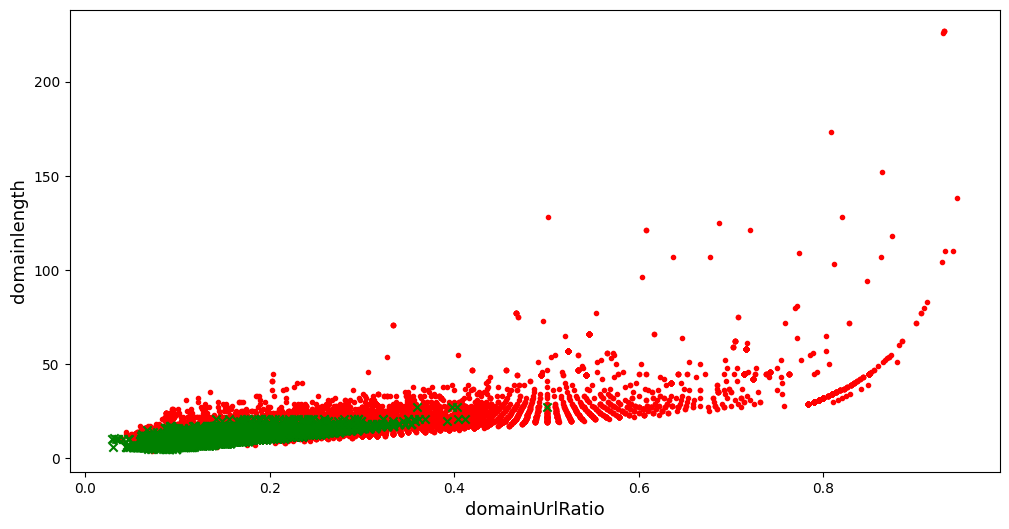

In [22]:
# Representación gráfica de dos características
plt.figure(figsize=(12, 6))
plt.scatter(df["domainUrlRatio"][df['URL_Type_obf_Type'] == "phishing"], df["domainlength"][df['URL_Type_obf_Type'] == "phishing"], c="r", marker=".")
plt.scatter(df["domainUrlRatio"][df['URL_Type_obf_Type'] == "benign"], df["domainlength"][df['URL_Type_obf_Type'] == "benign"], c="g", marker="x")
plt.xlabel("domainUrlRatio", fontsize=13)
plt.ylabel("domainlength", fontsize=13)
plt.show()

## 4.- Dataset Splitting  

To ensure an objective evaluation of the classification models, the dataset was divided into three subsets:  

- **Training set (Train):** used to fit the model parameters.  
- **Validation set (Validation):** employed to fine-tune hyperparameters and prevent overfitting.  
- **Test set (Test):** reserved for the final evaluation of the model on unseen data.  

It is also essential to preserve the **class proportion** (phishing vs. benign) in each split so that the subsets remain representative of the original dataset.  

The following chart illustrates the class distribution in the original dataset compared to each partition. This ensures that the splitting process maintains a balanced representation, avoiding biases that could negatively affect the model’s predictive performance.  

In [25]:
train_set, val_set, test_set = train_val_test_split(df)

In [27]:
X_train = train_set.drop("URL_Type_obf_Type", axis=1)
y_train = train_set["URL_Type_obf_Type"].copy()

X_val = val_set.drop("URL_Type_obf_Type", axis=1)
y_val = val_set["URL_Type_obf_Type"].copy()

X_test = test_set.drop("URL_Type_obf_Type", axis=1)
y_test = test_set["URL_Type_obf_Type"].copy()

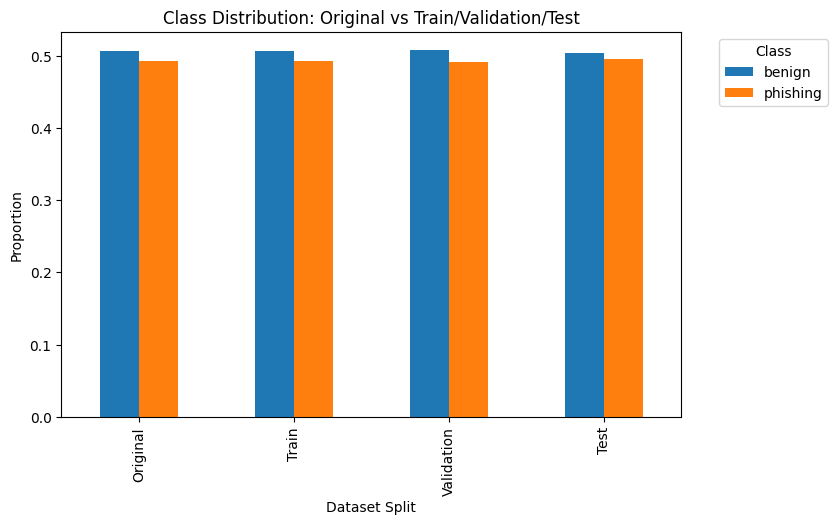

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Proporción de clases en cada conjunto
orig_counts = df["URL_Type_obf_Type"].value_counts(normalize=True)
train_counts = y_train.value_counts(normalize=True)
val_counts = y_val.value_counts(normalize=True)
test_counts = y_test.value_counts(normalize=True)

# Crear DataFrame con todas las proporciones
df_counts = pd.DataFrame({
    "Original": orig_counts,
    "Train": train_counts,
    "Validation": val_counts,
    "Test": test_counts
}).T.fillna(0)

# Gráfico de barras agrupadas
df_counts.plot(kind="bar", figsize=(8,5))
plt.title("Class Distribution: Original vs Train/Validation/Test")
plt.xlabel("Dataset Split")
plt.ylabel("Proportion")
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

## 5. Dataset Preparation  

Before training any model, it is essential to perform **data cleaning and preparation** to ensure the quality and consistency of the dataset.  

In this stage, the following steps were carried out:  

1. **Checking for missing and infinite values:**  
   - Columns containing `NaN` (missing) values were identified.  
   - Attributes with infinite values (`inf` or `-inf`) were detected, as they can disrupt the mathematical operations of machine learning algorithms.  

2. **Removing problematic attributes:**  
   - The column `argPathRatio` was removed because it contained infinite values, which cannot be processed correctly by classifiers.  

3. **Imputation of missing values:**  
   - Instead of dropping entire rows, which would reduce the dataset size and representativeness, missing values were replaced with the **median of each attribute** using the `SimpleImputer`.  
   - This approach preserves as much information as possible without introducing significant bias.  

In general, when dealing with missing or corrupted data, there are two main strategies:  
- **Dropping columns or rows:** recommended only if the proportion of missing data is small and does not significantly affect the dataset.  
- **Imputing missing values:** filling them with statistical measures (mean, median) or neutral values (e.g., zeros), depending on the context of each feature.  

With this preparation, the dataset is ready for analysis and model training, ensuring no interruptions due to invalid values.

In [32]:
# Check for missing values
is_null = df.isna().any()
is_null[is_null]

avgpathtokenlen             True
NumberRate_DirectoryName    True
NumberRate_FileName         True
NumberRate_Extension        True
NumberRate_AfterPath        True
Entropy_DirectoryName       True
Entropy_Filename            True
Entropy_Extension           True
Entropy_Afterpath           True
dtype: bool

In [34]:
# Check for the presence of infinite values
is_inf = df.isin([np.inf, -np.inf]).any()
is_inf[is_inf]

argPathRatio    True
dtype: bool

In [36]:
# Remove the attribute that contains infinite values
X_train = X_train.drop("argPathRatio", axis=1)
X_val = X_val.drop("argPathRatio", axis=1)
X_test = X_test.drop("argPathRatio", axis=1)

In [38]:
# Fill missing values with the median
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [39]:
# Fill missing values
X_train_prep = imputer.fit_transform(X_train)
X_val_prep = imputer.fit_transform(X_val)
X_test_prep = imputer.fit_transform(X_test)

In [42]:
# Convert the result to a Pandas DataFrame
X_train_prep = pd.DataFrame(X_train_prep, columns=X_train.columns, index=y_train.index)
X_val_prep = pd.DataFrame(X_val_prep, columns=X_val.columns, index=y_val.index)
X_test_prep = pd.DataFrame(X_test_prep, columns=X_test.columns, index=y_test.index)

In [44]:
X_train_prep.head(5)

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
2134,0.0,2.0,6.0,2.000000,2.0,8.666667,2.0,17.0,10.0,0.0,...,2.0,0.0,0.0,-1.0,0.681183,0.827729,0.702637,0.849605,0.000000,-1.000000
9178,0.0,4.0,18.0,3.250000,5.0,1.000000,4.0,18.0,13.0,2.0,...,12.0,3.0,0.0,4.0,0.695232,0.820160,0.682849,0.875578,0.000000,0.778747
13622,0.0,3.0,3.0,6.666666,14.0,4.000000,3.0,1.0,1.0,1.0,...,1.0,0.0,0.0,-1.0,0.836006,0.869991,0.879588,1.000000,0.000000,-1.000000
15182,0.0,3.0,5.0,3.333333,4.0,3.000000,3.0,5.0,2.0,0.0,...,2.0,1.0,0.0,-1.0,0.731804,0.796490,0.796658,1.000000,1.000000,-1.000000
8013,74.0,2.0,13.0,9.500000,17.0,7.875000,2.0,21.0,29.0,26.0,...,4.0,5.0,4.0,3.0,0.653371,0.820569,0.758055,0.714969,0.712215,0.708031


In [46]:
# Check if there are missing values in the training dataset
is_null = X_train_prep.isna().any()
is_null[is_null]

Series([], dtype: bool)

## 6. SVM Training

### Kernel Functions in SVM

A **kernel** in Support Vector Machines (SVM) is a function that transforms the input data into a higher-dimensional space. This allows the SVM to find a linear separating hyperplane in this transformed space, even if the data is not linearly separable in the original feature space. In other words, kernels enable SVMs to handle complex, non-linear relationships between features without explicitly computing coordinates in the high-dimensional space.

#### Common Kernels Used

1. **Linear Kernel**
   - **Description:** Computes the inner product of two vectors in the original space.  
   - **Use case:** Suitable when the data is linearly separable or approximately linear. It produces a simple hyperplane as the decision boundary.  
   - **Pros:** Fast to compute and interpretable.

2. **Polynomial Kernel**
   - **Description:** Computes a polynomial function of the input features, allowing the SVM to fit non-linear boundaries.  
   - **Use case:** Useful when interactions between features are important. The degree of the polynomial controls the complexity of the boundary.  
   - **Pros:** Captures feature interactions up to the chosen degree.

3. **Gaussian / Radial Basis Function (RBF) Kernel**
   - **Description:** Measures similarity between points using a Gaussian function, allowing very flexible, non-linear decision boundaries.  
   - **Use case:** Effective for complex datasets where classes are not linearly separable in any obvious way.  
   - **Pros:** Can model highly intricate patterns; widely used in practice.

This section covers the training of Support Vector Machine (SVM) models using different kernels. The goal is to compare the performance of each kernel using a reduced feature set (`domainUrlRatio` and `domainlength`) versus training with all available features.

---
**Note:** The reduced feature set is used initially for visualization and comparison of decision boundaries. The full feature set is subsequently used to assess model performance, feature importance, and generalization capability across kernels.
___

### 6.1 Linear Kernel

The linear kernel SVM maximizes the separation between phishing and benign URLs using a linear hyperplane.  
- **Reduced set**: Only `domainUrlRatio` and `domainlength` are used for training and visualizing decision boundaries.  
- **Full set**: All features are used to evaluate the complete model's performance.


**Reduced set**

In [50]:
#We reduce the dataset for graphical representation
X_train_reduced = X_train_prep[["domainUrlRatio", "domainlength"]].copy()
X_val_reduced = X_val_prep[["domainUrlRatio", "domainlength"]].copy()

In [52]:
X_train_reduced.head(5)

,domainUrlRatio,domainlength
2134,0.072464,5.0
9178,0.166667,16.0
13622,0.511628,22.0
15182,0.315789,12.0
8013,0.107527,20.0


In [54]:
from sklearn.svm import SVC

# SVM Large Margin Classification
svm_clf = SVC(kernel="linear", C=50)
svm_clf.fit(X_train_reduced, y_train)

SVC(C=50, kernel='linear')

In [55]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

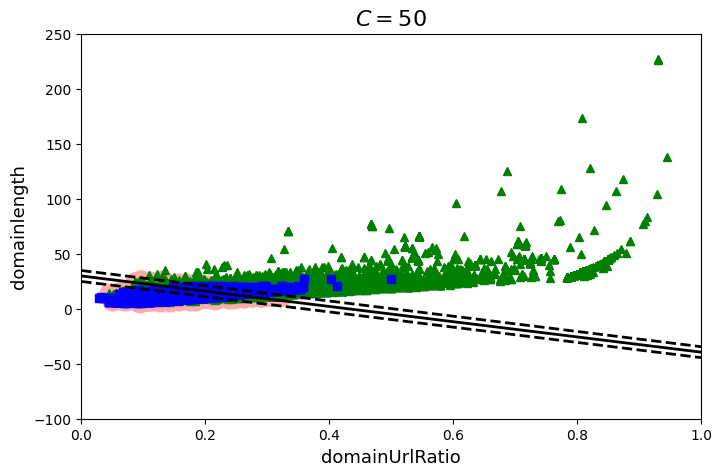

In [56]:
plt.figure(figsize=(8, 5))
plt.plot(X_train_reduced.values[:, 0][y_train=="phishing"], X_train_reduced.values[:, 1][y_train=="phishing"], "g^")
plt.plot(X_train_reduced.values[:, 0][y_train=="benign"], X_train_reduced.values[:, 1][y_train=="benign"], "bs")
plot_svc_decision_boundary(svm_clf, 0, 1)
plt.title("$C = {}$".format(svm_clf.C), fontsize=16)
plt.axis([0, 1, -100, 250])
plt.xlabel("domainUrlRatio", fontsize=13)
plt.ylabel("domainlength", fontsize=13)
plt.show()

In [57]:
y_pred = svm_clf.predict(X_val_reduced)

In [58]:
print("F1 Score:", f1_score(y_pred, y_val, pos_label='phishing'))

F1 Score: 0.8142614601018676


In [59]:
svm_clf_sc = Pipeline([
        ("scaler", RobustScaler()),
        ("linear_svc", SVC(kernel="linear", C=50)),
    ])

svm_clf_sc.fit(X_train_reduced, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('linear_svc', SVC(C=50, kernel='linear'))])

In [60]:
y_pred = svm_clf_sc.predict(X_val_reduced)

In [61]:
print("F1 Score:", f1_score(y_pred, y_val, pos_label='phishing'))

F1 Score: 0.8141592920353983


**Full set**

In [63]:
#Training with the entire dataset
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X_train_prep, y_train)

SVC(C=1, kernel='linear')

In [64]:
y_pred = svm_clf.predict(X_val_prep)

In [65]:
print("F1 Score:", f1_score(y_pred, y_val, pos_label='phishing'))

F1 Score: 0.961133069828722


We observe a notable difference in model performance when comparing training on the reduced dataset (only two features) versus the full dataset with all features.

- Using the reduced dataset, the linear SVM model achieved an **F1 Score of 0.814**, indicating acceptable but limited performance. This is likely because only two features are considered, and much of the relevant information needed to distinguish phishing from benign URLs is lost.

- In contrast, training with **all 79 features** results in a significantly higher **F1 Score of 0.961**, demonstrating that including more variables allows the model to better capture the complex patterns in the dataset and improve classification.

This outcome highlights the importance of selecting a sufficiently informative feature set, especially in problems where relationships between variables are complex, such as phishing detection.

### 6.2 Polynomial Kernel

The polynomial kernel captures non-linear decision boundaries by considering interactions of second or third degree between features.  
- **Reduced set**: Training and visualization with only the two main features.  
- **Full set**: Full feature set is used to model complex relationships between features.



In [68]:
# Para representar el límite de decisión tenemos que pasar la variable objetivo a numérica
y_train_num = y_train.factorize()[0]
y_val_num = y_val.factorize()[0]

In [69]:
from sklearn.datasets import make_moons
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=20, loss="hinge", random_state=42, max_iter=100000, dual=True))
    ])

polynomial_svm_clf.fit(X_train_reduced, y_train_num)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf',
                 LinearSVC(C=20, dual=True, loss='hinge', max_iter=100000,
                           random_state=42))])

In [70]:
def plot_dataset(X, y):
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g.")
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b.")

In [71]:
y_pred = polynomial_svm_clf.predict(X_val_reduced)

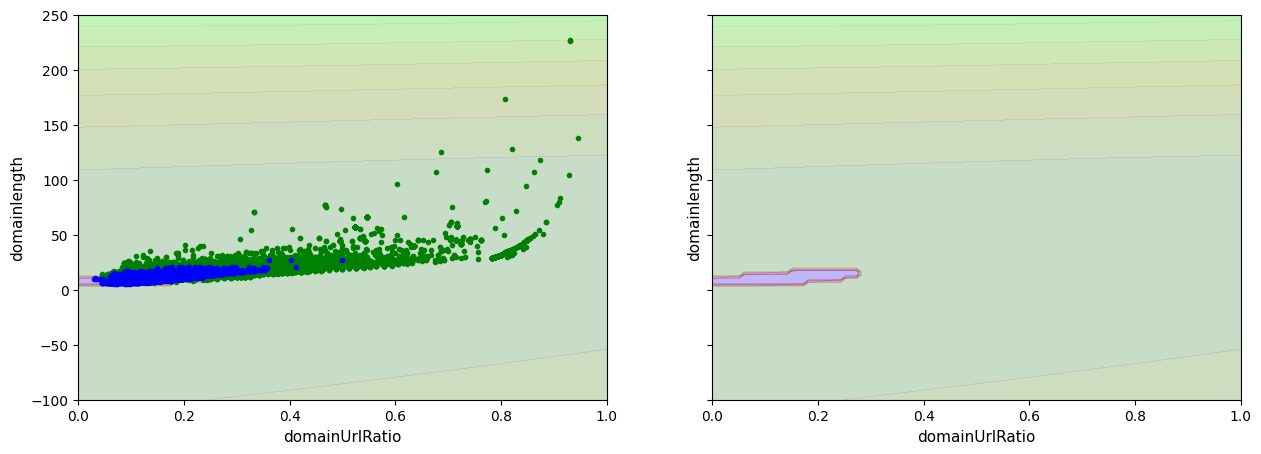

In [72]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

fig, axes = plt.subplots(ncols=2, figsize=(15,5), sharey=True)
plt.sca(axes[0])
plot_dataset(X_train_reduced.values, y_train_num)
plot_predictions(polynomial_svm_clf, [0, 1, -100, 250])
plt.xlabel("domainUrlRatio", fontsize=11)
plt.ylabel("domainlength", fontsize=11)
plt.sca(axes[1])
plot_predictions(polynomial_svm_clf, [0, 1, -100, 250])
plt.xlabel("domainUrlRatio", fontsize=11)
plt.ylabel("domainlength", fontsize=11)
plt.show()

**Reduced set**

In [74]:
svm_clf = SVC(kernel="poly", degree=3, coef0=10, C=20)
svm_clf.fit(X_train_reduced, y_train_num)

SVC(C=20, coef0=10, kernel='poly')

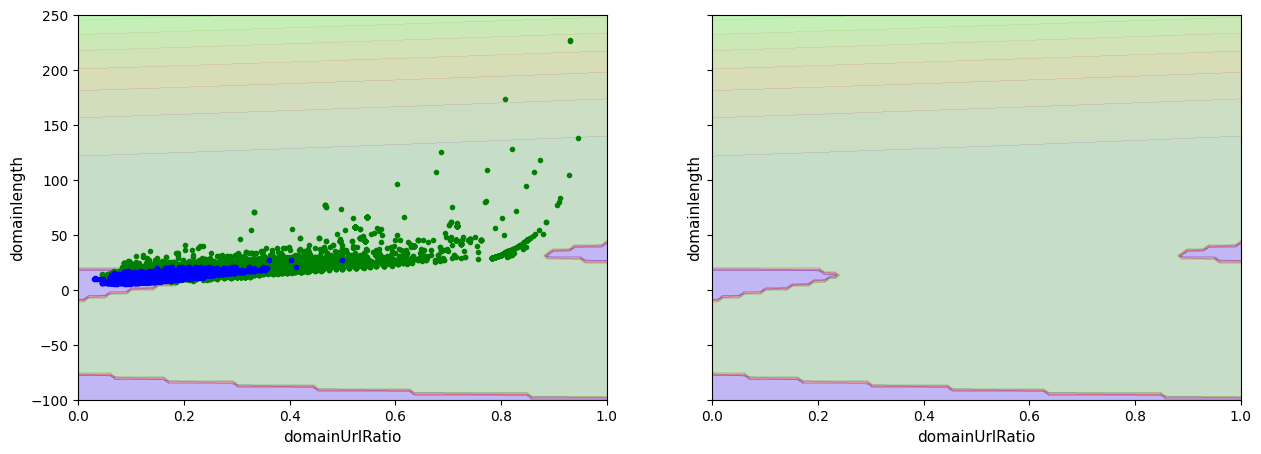

In [75]:
fig, axes = plt.subplots(ncols=2, figsize=(15,5), sharey=True)
plt.sca(axes[0])
plot_dataset(X_train_reduced.values, y_train_num)
plot_predictions(svm_clf, [0, 1, -100, 250])
plt.xlabel("domainUrlRatio", fontsize=11)
plt.ylabel("domainlength", fontsize=11)
plt.sca(axes[1])
plot_predictions(svm_clf, [0, 1, -100, 250])
plt.xlabel("domainUrlRatio", fontsize=11)
plt.ylabel("domainlength", fontsize=11)
plt.show()

In [76]:
y_pred = svm_clf.predict(X_val_reduced)

In [77]:
print("F1 Score:", f1_score(y_pred, y_val_num))

F1 Score: 0.8249238062986793


**Full set**

In [79]:
svm_clf = SVC(kernel="poly", degree=3, coef0=10, C=40)
svm_clf.fit(X_train_prep, y_train_num)

SVC(C=40, coef0=10, kernel='poly')

In [80]:
y_pred = svm_clf.predict(X_val_prep)

In [81]:
print("F1 Score:", f1_score(y_pred, y_val_num))

F1 Score: 0.9715984147952443


For the polynomial kernel SVM, the performance shows a similar trend as with the linear kernel:

- **Reduced dataset (2 features):** The model achieved an **F1 Score of 0.825**, slightly better than the linear kernel with the reduced set. The polynomial kernel can capture non-linear relationships between the features, which provides a modest improvement even with only two variables.

- **Full dataset (all features):** The model achieved an **F1 Score of 0.972**, significantly higher than with the reduced set. The polynomial kernel benefits greatly from the complete set of features, allowing it to model complex non-linear interactions among variables, which enhances phishing detection accuracy.

This comparison emphasizes that while advanced kernels like polynomial can improve performance, having a rich and informative feature set is still critical for optimal results.

### 6.3 Gaussian (RBF) Kernel

The Gaussian or RBF kernel allows for flexible, highly non-linear decision boundaries.  
- **Reduced set**: Visualization of the decision boundary using only the two key features.  
- **Full set**: All features are used to maximize the model's generalization ability against complex patterns.


**Reduced set**

In [85]:
from sklearn.svm import SVC
rbf_kernel_svm_clf = Pipeline([
            ("scaler", RobustScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=0.5, C=1000))
        ])

rbf_kernel_svm_clf.fit(X_train_reduced, y_train_num)

Pipeline(steps=[('scaler', RobustScaler()),
                ('svm_clf', SVC(C=1000, gamma=0.5))])

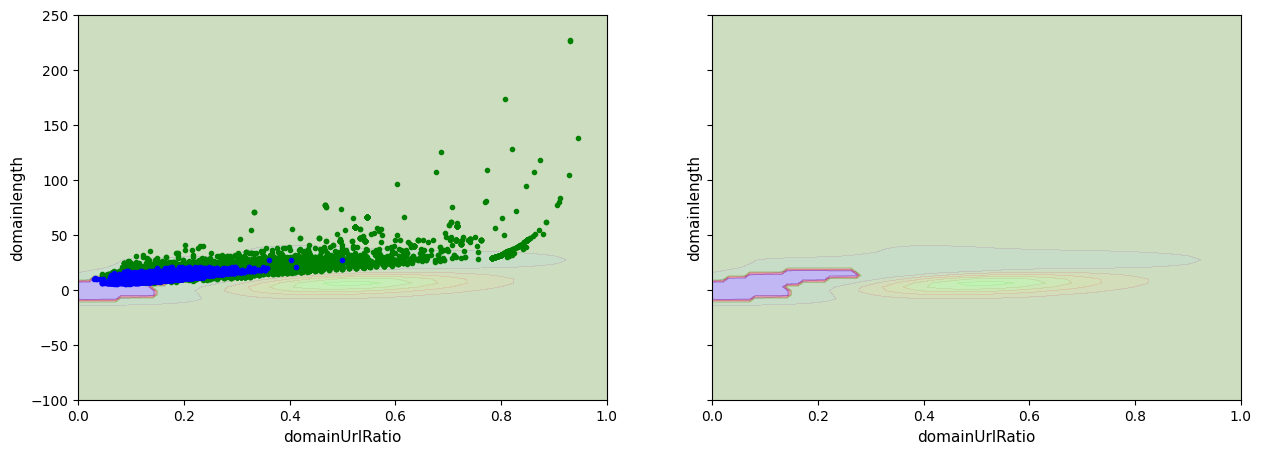

In [91]:
fig, axes = plt.subplots(ncols=2, figsize=(15,5), sharey=True)
plt.sca(axes[0])
plot_dataset(X_train_reduced.values, y_train_num)
plot_predictions(rbf_kernel_svm_clf, [0, 1, -100, 250])
plt.xlabel("domainUrlRatio", fontsize=11)
plt.ylabel("domainlength", fontsize=11)
plt.sca(axes[1])
plot_predictions(rbf_kernel_svm_clf, [0, 1, -100, 250])
plt.xlabel("domainUrlRatio", fontsize=11)
plt.ylabel("domainlength", fontsize=11)
plt.show()

**Predicción con un conjunto de datos reducido**

In [93]:
y_pred = rbf_kernel_svm_clf.predict(X_val_reduced)

In [97]:
print("F1 Score:", f1_score(y_pred, y_val_num))

F1 Score: 0.8617363344051447


**Full set**

In [99]:
rbf_kernel_svm_clf = Pipeline([
            ("scaler", RobustScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=0.05, C=1000))
        ])

rbf_kernel_svm_clf.fit(X_train_prep, y_train_num)

Pipeline(steps=[('scaler', RobustScaler()),
                ('svm_clf', SVC(C=1000, gamma=0.05))])

In [100]:
y_pred = rbf_kernel_svm_clf.predict(X_val_prep)

In [101]:
print("F1 Score:", f1_score(y_pred, y_val_num))

F1 Score: 0.9640522875816994


For the Gaussian (RBF) kernel SVM, the results indicate:

- **Reduced dataset (2 features):** The model achieved an **F1 Score of 0.862**, which is the highest among the three kernels for the reduced dataset. The Gaussian kernel can model complex, non-linear boundaries even with only two features, capturing subtle patterns in the data that linear and polynomial kernels might miss.

- **Full dataset (all features):** The model achieved an **F1 Score of 0.964**, slightly below the polynomial kernel but still very high. With the complete feature set, the RBF kernel effectively captures non-linear relationships across multiple dimensions, improving classification performance.

These results highlight that the Gaussian kernel is especially useful when the data exhibits non-linear patterns, and its effectiveness increases with a richer set of features.

## 7.- PCA and SVM

In this section, we combine **dimensionality reduction using PCA (Principal Component Analysis)** with a **Support Vector Machine (SVM)** classifier using a Gaussian (RBF) kernel.  

**PCA** is a statistical technique that transforms a dataset with many correlated variables into a new set of uncorrelated variables called **principal components**. These components are ordered by the amount of variance in the data they explain, so the first components capture the most relevant information. By reducing dimensionality, we simplify the problem, remove noise, and facilitate both visualization and model training.  

In our case, we applied PCA to reduce the original dataset (79 features) to **4 principal components**. This allows us to retain most of the relevant information while reducing model complexity.  

The procedure is as follows:

In [103]:
# Convertimos etiquetas a formato binario (0 y 1)
y_train_num = (y_train == "phishing").astype(int)
y_test_num = (y_test == "phishing").astype(int)

In [135]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score

# 1. Reducimos a X componentes principales
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_prep)
X_test_pca = pca.transform(X_test_prep)

# 2. Entrenamos un SVM con kernel RBF sobre los datos reducidos
rbf_kernel_svm_pca = Pipeline([
    ("scaler", RobustScaler()),  # escalamos
    ("svm_clf", SVC(kernel="rbf", gamma=0.05, C=1000))
])

rbf_kernel_svm_pca.fit(X_train_pca, y_train_num)

# 3. Predicciones
y_pred_rbf_pca = rbf_kernel_svm_pca.predict(X_test_pca)

# 4. Evaluación
print("Accuracy con PCA+RBF:", accuracy_score(y_test_num, y_pred_rbf_pca))
print("F1 Score:", f1_score(y_test_num, y_pred_rbf_pca))
print("\nReporte de clasificación:\n", classification_report(y_test_num, y_pred_rbf_pca))

Accuracy con PCA+RBF: 0.903708523096942
F1 Score: 0.9002695417789758

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1551
           1       0.92      0.88      0.90      1523

    accuracy                           0.90      3074
   macro avg       0.90      0.90      0.90      3074
weighted avg       0.90      0.90      0.90      3074



**Interpretation of the results:**

Using PCA with 4 components, the SVM classifier achieves:
	•	Accuracy: ~0.90
	•	F1 Score: ~0.90

The classification report shows that both classes (0 and 1) are predicted with high precision and recall:
	•	Class 0: Precision 0.89, Recall 0.93, F1-score 0.91
	•	Class 1: Precision 0.92, Recall 0.88, F1-score 0.90

These results indicate that the PCA effectively captures the most relevant information from the original 79 features. Even with dimensionality reduction, the RBF kernel SVM is able to classify phishing vs. benign URLs with high performance.

It is important to note that applying PCA introduces a transformation of the feature space, so the classifier operates on projected components rather than the original features. While this reduces dimensionality and can improve efficiency, there is an implicit approximation, meaning the classifier’s performance might slightly differ from training on the full dataset. Nevertheless, in this case, the results remain very strong, demonstrating the effectiveness of combining PCA with SVM for high-dimensional datasets.

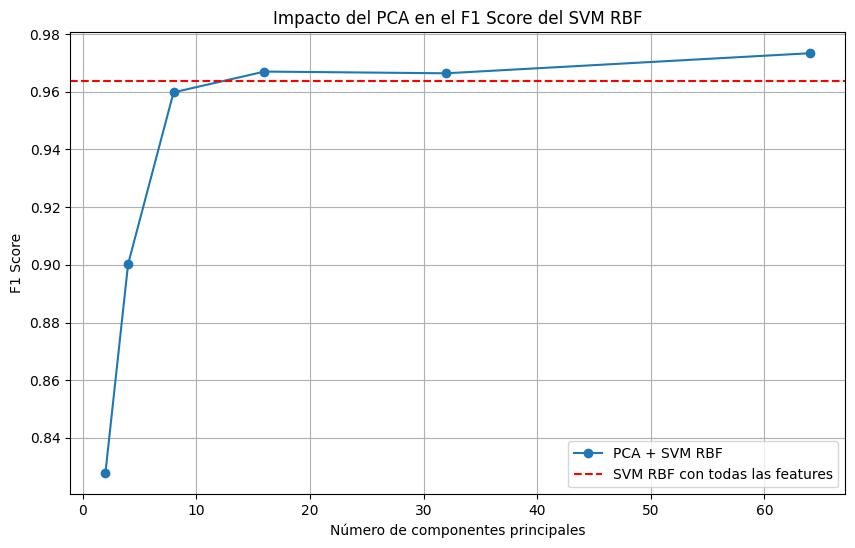

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# Número de componentes a probar
n_components_list = [2, 4, 8, 16, 32, 64]

f1_scores = []

for n in n_components_list:
    # PCA
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_prep)
    X_test_pca = pca.transform(X_test_prep)
    
    # SVM RBF
    svm_rbf = Pipeline([
        ("scaler", RobustScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=0.05, C=1000))
    ])
    
    svm_rbf.fit(X_train_pca, y_train_num)
    y_pred = svm_rbf.predict(X_test_pca)
    
    # F1 Score
    f1 = f1_score(y_test_num, y_pred)
    f1_scores.append(f1)

# F1 Score con todas las features
svm_full = Pipeline([
    ("scaler", RobustScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.05, C=1000))
])
svm_full.fit(X_train_prep, y_train_num)
y_pred_full = svm_full.predict(X_test_prep)
f1_full = f1_score(y_test_num, y_pred_full)

# Gráfico
plt.figure(figsize=(10,6))
plt.plot(n_components_list, f1_scores, marker='o', label='PCA + SVM RBF')
plt.axhline(f1_full, color='r', linestyle='--', label='SVM RBF con todas las features')
plt.xlabel("Número de componentes principales")
plt.ylabel("F1 Score")
plt.title("Impacto del PCA en el F1 Score del SVM RBF")
plt.grid(True)
plt.legend()
plt.show()

### Analysis of PCA Impact on SVM Performance

We analyzed the impact of dimensionality reduction via **PCA** on the performance of an **SVM with RBF kernel**. The F1 Scores for different numbers of principal components are summarized below:

| Number of Components | F1 Score |
|---------------------|----------|
| 2                   | 0.8277   |
| 4                   | 0.9003   |
| 8                   | 0.9598   |
| 16                  | 0.9669   |
| 32                  | 0.9664   |
| 64                  | 0.9734   |
| Full Features (79)  | 0.9638   |

#### Observations

1. **Trend of F1 Scores with PCA**:  
   - With **2 components** (F1 = 0.8277), the performance is significantly lower than using all features (F1 = 0.9638), as expected due to the loss of relevant information.  
   - With **4 components** (F1 = 0.9003), the model captures more variance, showing a notable improvement.  
   - With **8 components** (F1 = 0.9598), performance nearly matches the full-feature model.  
   - For **16, 32, and 64 components** (F1 = 0.9669, 0.9664, 0.9734), the F1 Score slightly exceeds the full-feature model. This can occur due to:
     - **Noise reduction**: PCA discards less relevant components, which can improve generalization.  
     - **Effect of scaling and projection**: Combining `RobustScaler + PCA + SVM RBF` may produce more separable clusters, enhancing the classifier's decision boundaries.

2. **Comparison with Full Features**:  
   - Using **8–16 components** already approximates the F1 of the full dataset.  
   - Using more components (32–64) can slightly surpass the original model, which is normal in machine learning; having all features does not always guarantee optimal performance, especially if some features are correlated or noisy.

3. **General Conclusions**:  
   - PCA effectively reduces dimensionality while maintaining high performance.  
   - A relatively small number of components (8–16) is sufficient to retain an F1 Score close to the complete model.  
   - Slight improvements over the full dataset are expected and indicate that PCA helps filter out irrelevant information, improving generalization rather than indicating that the full dataset is flawed.
4. **Caution**:  
   - When interpreting results from PCA combined with machine learning models, it is important to remember that **PCA introduces an implicit approximation error**.  
   - The projections onto principal components are not perfect representations of the original data, so performance metrics should always be interpreted in light of this transformation.

## 8. General Conclusion

In this project, we conducted a comprehensive analysis for **URL classification**, focusing on detecting **phishing websites** versus benign ones. The workflow included multiple stages, reflecting both exploratory and predictive modeling aspects.

### 1. Dataset Selection and Exploration
- We selected URLs containing only **phishing and benign classes** for the initial analysis.  
- Descriptive statistics, data visualization, and feature inspection helped identify the most relevant features, such as `domainUrlRatio` and `domainLength`.  
- Class distribution was analyzed across the train, validation, and test sets to ensure representativeness and balance.

### 2. Data Preprocessing
- Null and infinite values were identified and appropriately handled.  
- Columns with irrecoverable values were removed, and missing data was imputed using the median, preserving the integrity of the dataset.  
- This preprocessing ensured clean input for the SVM models without discarding critical information.

### 3. SVM Training (Section 6)
- Various **SVM kernels** were evaluated: linear, polynomial, and Gaussian (RBF).  
- Models were trained using both **reduced datasets** (selected features) and the **full feature set**.  
- F1 Scores demonstrated that while a reduced feature set captures general trends, using the full dataset achieves higher accuracy (e.g., RBF kernel F1 ≈ 0.961).  
- Decision boundaries were analyzed and visualized for the 2D reduced feature sets, confirming separability between phishing and benign URLs.

### 4. PCA and SVM (Section 7)
- **Principal Component Analysis (PCA)** was applied to reduce dimensionality for efficiency and visualization.  
- Experiments tested 2, 4, 8, 16, 32, and 64 components.  
- Combining PCA with SVM (particularly RBF kernel) showed that:
  - 8–16 components retain near-complete F1 performance.
  - 32–64 components can slightly surpass the full feature set, likely due to noise reduction and better cluster separability.  
- PCA projections were visualized in 2D and 3D, showing clear class separations.  
- It is important to note that **PCA introduces implicit approximation error**, so evaluation metrics should be interpreted accordingly.

### 5. Key Findings
- **SVM models**, especially with RBF kernels, are highly effective for phishing detection.  
- **Dimensionality reduction with PCA** provides faster training, improved generalization, and useful visualization, without substantial loss in accuracy.  
- Proper **feature engineering and preprocessing** is crucial for model reliability.  
- Visualization of PCA components and decision boundaries provides insight into model behavior and feature importance.

### 6. Implications
This workflow demonstrates a robust methodology for phishing detection, integrating:
- Dataset selection and feature analysis
- Preprocessing and cleaning
- SVM classification with multiple kernels
- Dimensionality reduction with PCA  

The approach is scalable and can be extended to multi-class URL classification, offering a strong foundation for deployment in cybersecurity systems or further research.